# **1. 기초 통계**

## 1-1 Iris 데이터셋 로딩

In [47]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1-2 기술통계랑 산출

In [18]:
import pandas as pd

iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


## 1-3 시각화

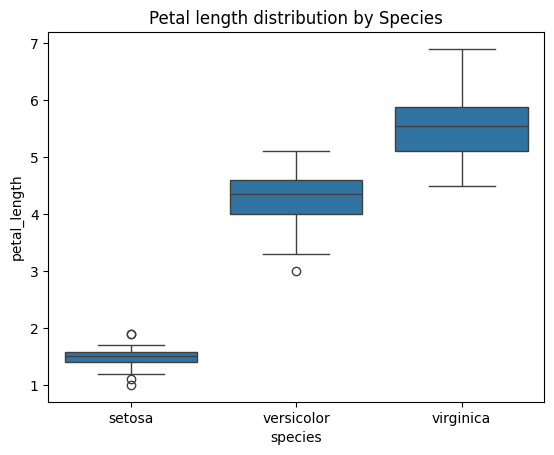

In [19]:
import matplotlib.pyplot as plt

sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal length distribution by Species')
plt.show()

종별로 비교한 결과, 평균 Petal Length는 virginica > versicolor > setosa 순으로 높게 나타났다.

## 1-4 정규성 검정

- H₀: 데이터는 정규성을 따른다
- H₁: 데이터는 정규성을 따르지 않는다
- 유의수준 α = 0.05

In [35]:
from scipy import stats

alpha = 0.05

for s in iris['species'].unique():
    petal_length = iris[iris['species'] == s]['petal_length']
    _, p_value = stats.shapiro(petal_length)

    if p_value > alpha:
        print(f"{s} 데이터는 정규성을 따른다 (p-value: {p_value})")
    else:
        print(f"{s} 데이터는 정규성을 따르지 않는다 (p-value: {p_value})")

setosa 데이터는 정규성을 따른다 (p-value: 0.0548114671955363)
versicolor 데이터는 정규성을 따른다 (p-value: 0.15847783815657573)
virginica 데이터는 정규성을 따른다 (p-value: 0.10977536903223506)


## 1-5 등분산성 검정

- H₀: 데이터는 등분산을 따른다
- H₁: 데이터는 등분산을 따르지 않는다
- 유의수준 α = 0.05

In [36]:
species_list = iris['species'].unique()

for i in range(len(species_list)):
    for j in range(i + 1, len(species_list)):
        species1 = iris[iris['species'] == species_list[i]]['petal_length']
        species2 = iris[iris['species'] == species_list[j]]['petal_length']
        _, p_value = stats.levene(species1, species2)

        if p_value > alpha:
            print(f"{species_list[i]}와 {species_list[j]} 데이터는 등분산을 따른다 (p-value: {p_value})")
        else:
            print(f"{species_list[i]}와 {species_list[j]} 데이터는 등분산을 따르지 않는다 (p-value: {p_value})")

setosa와 versicolor 데이터는 등분산을 따르지 않는다 (p-value: 2.7443023022053794e-07)
setosa와 virginica 데이터는 등분산을 따르지 않는다 (p-value: 8.870504350293737e-09)
versicolor와 virginica 데이터는 등분산을 따른다 (p-value: 0.30406773202289633)


## 1-6 가설 수립

- H₀: 3개 Species 간 Petal Length의 평균이 모두 같다
- H₁: 적어도 하나의 Species는 Petal Length의 평균이 다르다
- 유의수준 α = 0.05

## 1-7 ANOVA 실행

In [37]:
F, p_value = stats.f_oneway(
    iris[iris['species'] == 'setosa']['petal_length'],
    iris[iris['species'] == 'versicolor']['petal_length'],
    iris[iris['species'] == 'virginica']['petal_length']
)

print(f"F: {F}, p-value: {p_value}")

if p_value > alpha:
    print("귀무가설을 채택하고, 3개 Species 간 Petal Length의 평균이 모두 같다.")
else:
    print("귀무가설을 기각하고, 적어도 하나의 Species는 Petal Length의 평균이 다르다.")

F: 1180.161182252981, p-value: 2.8567766109615584e-91
귀무가설을 기각하고, 적어도 하나의 Species는 Petal Length의 평균이 다르다.


## 1-8 사후검정

In [42]:
import statsmodels.stats.multicomp as multi

posthoc = multi.MultiComparison(
    iris['petal_length'],
    iris['species']
)

print(posthoc.tukeyhsd().summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


모든 쌍에 대해 petal length의 평균 차이가 유의미함(p-adj < 0.05)으로 나타났다.  

## 1-9 결과 요약  
→ 평균 Petal Length: virginica > versicolor > setosa (모든 그룹 간 유의한 차이)


#2. 기초 머신러닝

## 2-1 데이터 로드 및 기본 탐색

In [1]:
import pandas as pd

credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [2]:
credit['Class'].value_counts()

,count
Class,
0.0,27725
1.0,93


## 2-2 샘플링

In [3]:
normal = credit[credit['Class'] == 0.0].sample(10000, random_state=42)
fraud = credit[credit['Class'] == 1.0]

credit_sample = pd.concat([normal, fraud])
credit_sample['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.990786
1.0,0.009214


## 2-3 데이터 전처리

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_sample['Amount_Scaled'] = scaler.fit_transform(credit_sample[['Amount']])
credit_sample.drop(columns=['Amount'], inplace=True)

X = credit_sample.drop('Class', axis=1)
y = credit_sample['Class']

## 2-4 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train class ratio:")
print(y_train.value_counts(normalize=True))

print("\nTest class ratio:")
print(y_test.value_counts(normalize=True))


Train class ratio:
Class
0.0    0.990835
1.0    0.009165
Name: proportion, dtype: float64

Test class ratio:
Class
0.0    0.990589
1.0    0.009411
Name: proportion, dtype: float64


## 2-5 SMOTE

모델이 소수 클래스를 충분히 학습할 수 있도록 유도하기 위하여 SMOTE를 적용하였다.

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Class
0.0    8000
1.0      74
Name: count, dtype: int64

After SMOTE:
Class
0.0    8000
1.0    8000
Name: count, dtype: int64


## 2-6 모델 학습

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='average_precision', cv=5)
grid.fit(X_train_smote, y_train_smote)

print("Best params:", grid.best_params_)

Best params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [11]:
from sklearn.metrics import classification_report, average_precision_score, f1_score

# 확률 예측
y_probs = grid.predict_proba(X_test)[:, 1]

# 최적 threshold 탐색
best_f1 = 0
best_thresh = 0

for t in [i/100 for i in range(10, 91, 5)]:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\nBest threshold: {best_thresh}, Best F1-score: {best_f1:.4f}")


Best threshold: 0.8, Best F1-score: 0.9744


In [12]:
# 최적 threshold로 최종 예측
y_pred_best = (y_probs >= best_thresh).astype(int)

# classification report
print(classification_report(y_test, y_pred_best))

# PR-AUC 계산
ap_score = average_precision_score(y_test, y_probs)
print(f"Average Precision Score (PR-AUC): {ap_score:.4f}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2000
         1.0       0.95      1.00      0.97        19

    accuracy                           1.00      2019
   macro avg       0.97      1.00      0.99      2019
weighted avg       1.00      1.00      1.00      2019

Average Precision Score (PR-AUC): 0.9974


## 2-7 최종 성능 평가

Logistic Regression 모델에 최적 threshold 탐색과 GridSearchCV를 통한 하이퍼파라미터 튜닝을 통해 과제 기준(Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90)을 달성했다.